<a href="https://colab.research.google.com/github/karthisha-13/EXPLAINABLE-AI_2303A52099/blob/main/Pratice_problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression equation: y = 20.00 + 0.50*IQ + 0.50*StudyHours
Predicted test score for IQ=95, StudyHours=25: 80.00

Results with SHAP values:
     IQ  StudyHours  TestScore  IQ_SHAP  StudyHours_SHAP  Prediction  Baseline
0  110          40        100      5.0             10.0        95.0      80.0
1  120          30         90     10.0              5.0        95.0      80.0
2  100          20         80      0.0              0.0        80.0      80.0
3   90           0         70     -5.0            -10.0        65.0      80.0
4   80          10         60    -10.0             -5.0        65.0      80.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


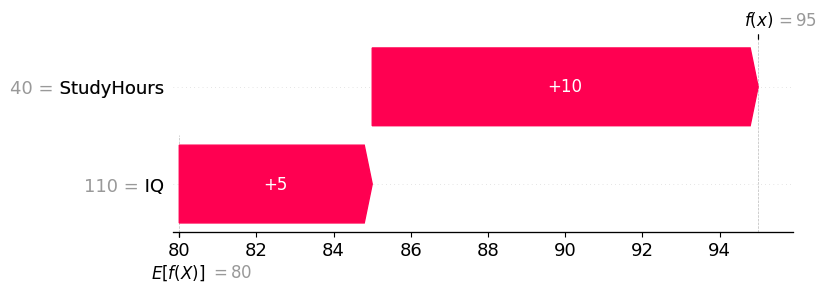

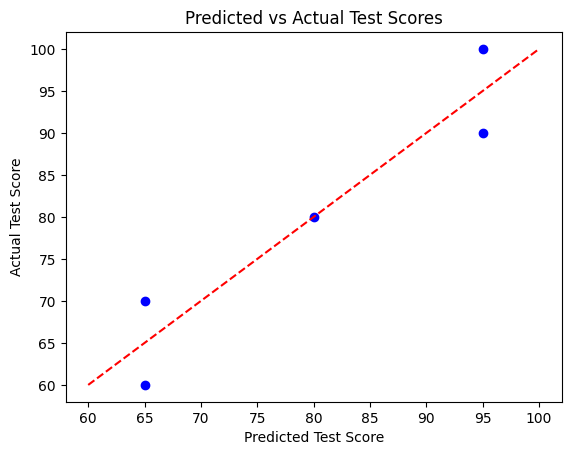


Students where StudyHours contribution > IQ contribution:
     IQ  StudyHours  IQ_SHAP  StudyHours_SHAP
0  110          40      5.0             10.0
3   90           0     -5.0            -10.0
Instance 1: TV Ads = 110, Base Prediction = 80.00, SHAP Contribution = 5.00, Final Prediction = 85.00
Instance 2: TV Ads = 120, Base Prediction = 80.00, SHAP Contribution = 10.00, Final Prediction = 90.00
Instance 3: TV Ads = 100, Base Prediction = 80.00, SHAP Contribution = 0.00, Final Prediction = 80.00
Instance 4: TV Ads = 90, Base Prediction = 80.00, SHAP Contribution = -5.00, Final Prediction = 75.00
Instance 5: TV Ads = 80, Base Prediction = 80.00, SHAP Contribution = -10.00, Final Prediction = 70.00


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_excel("/content/StudyHour.xlsx")

df.columns = df.columns.str.strip()

X = df[['IQ', 'StudyHours']]
y = df['TestScore']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_
print(f"Regression equation: y = {intercept:.2f} + {coef[0]:.2f}*IQ + {coef[1]:.2f}*StudyHours")

example_input = np.array([[95, 25]])
pred_example = model.predict(example_input)[0]
print(f"Predicted test score for IQ=95, StudyHours=25: {pred_example:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap_contrib = pd.DataFrame(shap_values.values, columns=['IQ_SHAP', 'StudyHours_SHAP'])
results = pd.concat([df, shap_contrib], axis=1)
results['Prediction'] = model.predict(X)
results['Baseline'] = shap_values.base_values
print("\nResults with SHAP values:\n", results)

shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values)

plt.scatter(results['Prediction'], y, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Predicted Test Score')
plt.ylabel('Actual Test Score')
plt.title('Predicted vs Actual Test Scores')
plt.show()

mask = results['StudyHours_SHAP'].abs() > results['IQ_SHAP'].abs()
print("\nStudents where StudyHours contribution > IQ contribution:\n", results[mask][['IQ', 'StudyHours', 'IQ_SHAP', 'StudyHours_SHAP']])
for i in range(len(df)):
    base_value = shap_values.base_values[i]
    contribution = shap_values.values[i][0]
    print(f"Instance {i+1}: TV Ads = {X.iloc[i,0]}, "
          f"Base Prediction = {base_value:.2f}, "
          f"SHAP Contribution = {contribution:.2f}, "
          f"Final Prediction = {base_value + contribution:.2f}")